In [11]:
import sys

def function(x):
    return x**2 - 1

def dfunction(x):
    return 2 * x

def Newton_Solver( x0, tol = 10e-12, max_iter = 100):
    x = x0
    for i in range(max_iter):
        fx = function(x)
        dfx = dfunction(x)
        if abs(fx) < tol:
            print( 'convergence reached, x =',x)
            return x
        if dfx == 0:
            print('singularity hit: exiting')
            sys.exit(0)
        x = x - fx/dfx
        # if i % 10 == 0:
        print('newton iteration:',i,'value is currently:',x)

x_solution = Newton_Solver(0.5)
x_solution_2 = Newton_Solver(-0.1)
print("sol:",x_solution,x_solution_2)

newton iteration: 0 value is currently: 1.25
newton iteration: 1 value is currently: 1.025
newton iteration: 2 value is currently: 1.0003048780487804
newton iteration: 3 value is currently: 1.0000000464611474
newton iteration: 4 value is currently: 1.000000000000001
convergence reached, x = 1.000000000000001
newton iteration: 0 value is currently: -5.049999999999999
newton iteration: 1 value is currently: -2.6240099009900986
newton iteration: 2 value is currently: -1.5025530119986812
newton iteration: 3 value is currently: -1.0840434673026924
newton iteration: 4 value is currently: -1.0032578510960606
newton iteration: 5 value is currently: -1.0000052895642693
newton iteration: 6 value is currently: -1.0000000000139897
newton iteration: 7 value is currently: -1.0
convergence reached, x = -1.0
sol: 1.000000000000001 -1.0


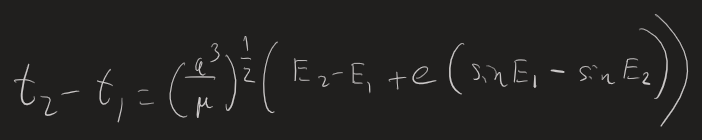
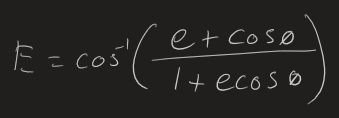


T = ((2*pi)/(sqrt(mu)))\*a^(3/2)

a = (T*sqrt(mu)/(2\*pi))^(2/3)

In [27]:
# problem 3.10 in Curtis p.g. 179 
# An earth-orbiting satellite has a period of 15h and a perigee radius of 10,000 km. 
# At time t = 10h after perigee passage, determine:
# (a) The radial position
# (b) The speed
# (c) The radial component of the velocity

from sympy import *

mu =       Symbol('mu')
r_earth =   Symbol( 'r_earth')
r_p =     Symbol('r_p')
Period =     Symbol('Period')
t_i = Symbol('t_i')

values = [
    (mu         ,3.986*10**5 ) ,
    (r_earth    ,6378 ),
    (r_p      ,10000) ,
    (Period      ,14*3600) ,
    (t_i, 10*3600)
]


a = ((Period*mu**(0.5))/(2*pi))**(2/3)

r_a = 2*a - r_p

e = (r_a - r_p)/(r_a + r_p)

# we need angular momentum
h = (a*mu*(1-e**2))**0.5

v_p = r_p*h

print(e.subs(values).evalf())

# calculate mean anomaly using eq 3.15
mean_anomaly = 2*pi*t_i/Period

# Now we need to use newtons method to calculate the eccentric anomalies

def function(E):
    return E - e*sin(E) - mean_anomaly

def dfunction(E):
    return 1 - e*cos(E)

def Newton_Solver( E0, tol = 10e-12, max_iter = 100):
    x = E0
    for i in range(max_iter):
        fx = function(x)
        fx = fx.subs(values).evalf()
        dfx = dfunction(x)
        dfx = dfx.subs(values).evalf()
        if abs(fx) < tol:
            print( 'convergence reached, x =',x)
            return x
        if dfx == 0:
            print('singularity hit: exiting')
            sys.exit(0)
        x = x - fx/dfx
        # if i % 10 == 0:
        print('newton iteration:',i,'value is currently:',x)

# Let us try it out!
E_1 = Newton_Solver((pi/2).evalf())

print("eccentric anomoly 1:",E_1)

# now we can finally calculate thetas

theta = 2*atan((((1+e)/(1-e))**(1/2))*tan(E_1/2))

print('theta1 = ', (theta*180/pi).subs(values).evalf())

r_i = (h*h/mu)/(1 + e*cos(theta))

v_rad = (mu/h)*e*sin(theta)
v_perp = h/r_i

v = (v_rad**2 + v_perp**2)**(0.5)

print("(a) radius at theta",theta.subs(values).evalf(),":",r_i.subs(values).evalf(),"km")
print("(b) radial velocity:",v_rad.subs(values).evalf(),"km/s")
print("(c) total velocity:",v.subs(values).evalf(),"km/s")




0.660905725833850
newton iteration: 0 value is currently: 5.14889523096213
newton iteration: 1 value is currently: 3.40053638568162
newton iteration: 2 value is currently: 3.96081318537048
newton iteration: 3 value is currently: 3.99134488756194
newton iteration: 4 value is currently: 3.99150305928556
newton iteration: 5 value is currently: 3.99150306360941
convergence reached, x = 3.99150306360941
eccentric anomoly 1: 3.99150306360941
theta1 =  -156.887792721536
(a) radius at theta -2.73820853917719 : 42354.9210779852 km
(b) radial velocity: -1.27090162503028 km/s
(c) total velocity: 2.30338883594495 km/s
